In [37]:
from Capstone_Group2_Utility import high_salary, low_salary



# Group 2 Capstone Project

**December 12, 2020.**




*Manpreet Kaur, Mustafa Abdullayev, Meenakshi Krishna*

# Census Income Analysis


### **Project Summary**

Our data has been extracted from the Census Bureau database from the 1994. The data is rich and very intriguing since it has interesting information like the education and marital status of an individual, his relationship to the spouse, hours of work. We carried out research for which predictive model would most suitaable for an imbalanced dataset of this kind, where both the label- >50K and <50K had equal importance. 

We adressed social questions like - 

 **What was the marital status of majority of male and female with high salary and high education?**

Married status was high in both men and women. However, it was evident that women were not affected by their marital status compared the men


 **Did farmers with high educations and long hours of working still have have salary?**

We found out that farmers with high education status and/or large number of working hours still had majority with low salary


  **At what age groups do people make the most money?**

  High salary folks were found highest in age groups - 30 to 50

  **Was there salary gap for white an other in US?**

Yes, whites percentage having a higher salary was much compared to the other races.

**Prediction of Salary category**

Prediction whether a person based on his race, education, marital status and age could be a high paying or low paying individual. Metric used was AUC as both categoriws were equally important, though data was unbalanced.

After research, we applied Naive Bayes as all our columns were independent with each other.














### **Introduction**



In 1790 was the first United States Census ever with had original 13 states participating in it, including the districts of Kentucky, Maine, and Vermont; and the Southwest Territory (Tennessee).

We carried out this study which had data assessed from the University of California Irvine (UCI) Machine Learning Repository. Originally, it was extracted in 1994 census dataase by Barry Becker. The data has arounf 32k records and 14 features from various countires. We eliminated all countries but USA as that formed a large part of the dataset.

The data was downloaded from - http://archive.ics.uci.edu/ml/datasets/Adult. This was a relatively clean datawith suitable conditions excercised to form a part of census data ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)) .

Prediction task is to determine whether a person makes over or below 50K a year. 



### **Research Questions and Data Methodology**


**Research Questions**

The problem of income inequality has been of great concern in the recent years. United States is a string believer that this inequality must be eradicated. We have, through this analysis, tries to find a pattern of which areas of people need the most uplifting and what categories of people can expect high salaries.


We examined the data to answer the following questions


1.   What was the marital status of majority of male and female with high  salary and high education?
2.   Did Farmers with high educations and long hours of working still have have salary?
3.   At what age groups do people make the most money?
4.   Was there salary gap for white an other in US?







**Data Methodology**

We employed a standard data analytics work flow.
● Data cleaning, tidying, calculating o Removing NA and empty space, o Renaming columns to
appropriate name o Remove unimportant variables  o Make tidy, as needed

● Data visualization (examples) Identify relationship between various important variables like education,race, age, marital status, hours per week.

● Data analysis (examples) Answering question from the data and finding patterns.

● Model Building o Randomly divide the dataset into Train and Test sets o Pick out factors that correlate to
violation result o Randomly divide the dataset between Train and Test portions o Try training a modes on the
Train dataset o Decide on metrics to assess performance of model o Use the models on the Test dataset o
Compare Predictions of Test dataset to actual values in Test dataset

### **Procedure and Discussion**






**Import Necessary Libraries** 


Before we begin, we require the following libraries and dependencies, which need to be imported into our Python environment. These libraries will make our tasks a lot easier, as they have readily available functions and models that can be used instead of doing that ourselves. This also makes the code more compact and readable.

In [38]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
#from google.colab import files
import io
import random
import copy

#Import graphic libraries
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns

#Import machine learning libraries
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,auc,roc_auc_score

In [39]:
#import our custom functions
import Capstone_Group2_Utility

**Import Dataset** 


We accessed a public data set from UCI Machine Learning Libraries at this website: http://archive.ics.uci.edu/ml/datasets/Adult. This data was extracted by Barry Becker from the 1994 Census database on a set of conditions to give us clean records. The conditions are: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)) 


The data represented different attributes of the people inclusing their Age, work-class, education, marital status, occupation, race, sex, hours per week and income. Overall, the dataset contains 32,561 entries with a total of 15 columns 



In [40]:
#uploaded = files.upload()
#data = pd.read_csv(io.BytesIO(uploaded['adult.csv']))

#reading the census data
data = pd.read_csv('adult.csv')

**Table 1. First Five Rows of Census Data** **bold text**

In [41]:
data.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


**Data Set Profiling**

Before digging further in the data, it is important to understand the nature of evey column and each column means. To begin, all our columns are categorical and we can see the unique features of each column
The columns are mainly the basic yet important details of every person, like the highest education received, marital status, falimy, stature, gender, country. 

On analysis, we realised that even the columns numbered fnlwgt was the only non categorical in nature.

In [42]:
print("The dimensions of the Census data is: {}".format(data.shape))
print("The size of the Census data is: {}".format(data.size))
Datal = data.astype('category')

The dimensions of the Census data is: (32561, 15)
The size of the Census data is: 488415




**Table 2. Categorical Description of The Dataset Columns**

In [43]:
Datal.describe()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,73,9,21648,16,16,7,15,6,5,2,119,92,94,42,2
top,36,Private,164190,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
freq,898,22696,13,10501,10501,14976,4140,13193,27816,21790,29849,31042,15217,29170,24720


### **Data Cleaning**

Data cleaning is the cleansing process of to ensure we it is free of incorrect information and clear of irrelevances.
Our dataset was relatively clean and was easy to begin with.

**1. Removal of Unwanted Observations**

We observed that the 2 columns present education and education number have the same information. Education is the name of the level (example - High School) whereas, education number is the corresponding number. It is important to note here that the number is in order of education level attained, and not a randomly assignned number (will drop this while building the prediction model)

**2. Duplicate Observations**
All the missing rows with any value missing will be merely dropped from the data. There are no missing. However, there is a ? symbol used in this dataset to indicate a missing value





**Table 3. Checking out null values**

In [44]:
missing_data = data.isnull()
#total_missing = missing_data.sum().sort_values(ascending = False)
print(missing_data.sum())


age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


In [45]:
if '?' not in data.values : 
    print(" \"?\"  does not exists in Dataframe") 
  
else : 
    print("\"?\" exists in Dataframe")

"?" exists in Dataframe


**Table 4. Locating where'?' occurs**

In [46]:
data.replace('?',np.nan,inplace=True)
print(data.isnull().sum())
#"? value occurs in workclass, occupation and native.country columns"

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64


**Table 5. Percentage of missing values in every column**

In [47]:
## What Percentage of each column is missing

missing_data = data.isna()
total = missing_data.sum().sort_values(ascending = False)
percentage = (missing_data.sum()/missing_data.count()*100).sort_values(ascending = False)
missing_data = pd.concat([total, percentage], axis = 1, keys = ['Total','Percent'])
print(missing_data)

                Total   Percent
occupation       1843  5.660146
workclass        1836  5.638647
native.country    583  1.790486
income              0  0.000000
hours.per.week      0  0.000000
capital.loss        0  0.000000
capital.gain        0  0.000000
sex                 0  0.000000
race                0  0.000000
relationship        0  0.000000
marital.status      0  0.000000
education.num       0  0.000000
education           0  0.000000
fnlwgt              0  0.000000
age                 0  0.000000


After finding missing values, which were encoded as '?', We changed to standard nan values and dropped them. The reason for dropping is because there are not many and dropping will not significantly change our analysis.

In [48]:
data.dropna(inplace=True)

**Table 6. Data type of every column**

In [49]:
##checking to make sure data types are consistent
data.dtypes


age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

### **Data Transformmation**


In many column we observerd that the column name was native.country and we know, that dot operator is to call functions in python. To avoid conflict, we renamed the dot in column names to an underscore(_).

Also, 'USA' has 90% of our data. And the rest 41 countries comprised of 10% of this data. So, we removed USA from the data analysis part of this project and focussed on solely USA.

In [50]:

#Transforming (.) to (_)
data = data.rename(columns={ 'marital.status':'marital_status', 'native.country':'country','education.num':'education_number', 'capital.gain':'capital_gain','capital.loss': 'capital_loss','hours.per.week':'weekly_hours'})

#Preserving the copy for ML
data_ml = copy.deepcopy(data)

#Removing all countries expect United-States
data = data[data.country == 'United-States']


### **Data Exploration**


> **Univariable Analysis**



**Table 7. Distribution of working hours per week**

Text(0.5, 1.0, 'Distribution of working hours per week')

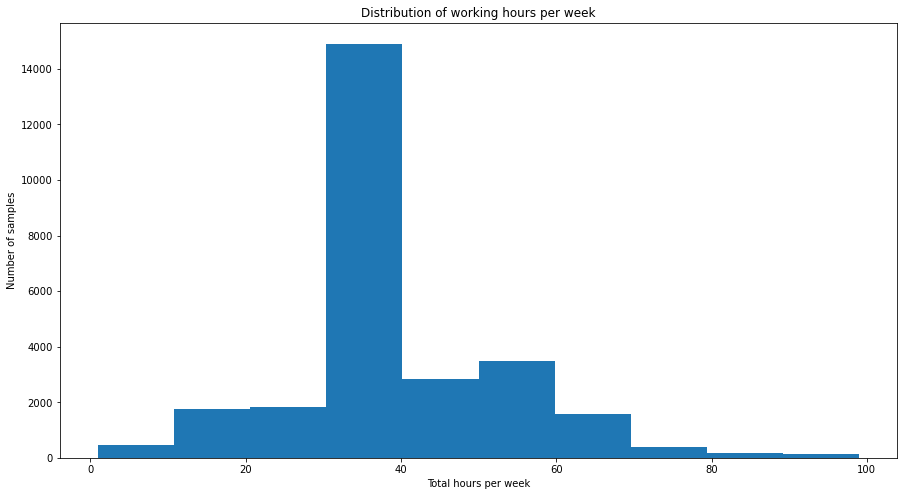

In [51]:
plt.figure(figsize=(15,8))
plt.hist(data.weekly_hours, bins = 10)
#sns.histplot(data=data, x="weekly_hours",binwidth=10)

plt.xlabel('Total hours per week')
plt.ylabel('Number of samples')
plt.title('Distribution of working hours per week')


**Table 8. Gender count in dataset**

In [52]:
data['sex'].value_counts()

## From above code we see that there are toral 20380 male and 9782 female

Male      18572
Female     8932
Name: sex, dtype: int64

**Table 9. Education count of each education level**

[]

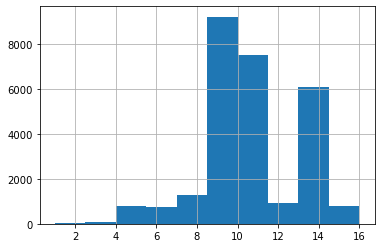

In [53]:
data['education_number'].hist()
plt.plot()

# **Gender distribution for each education level**

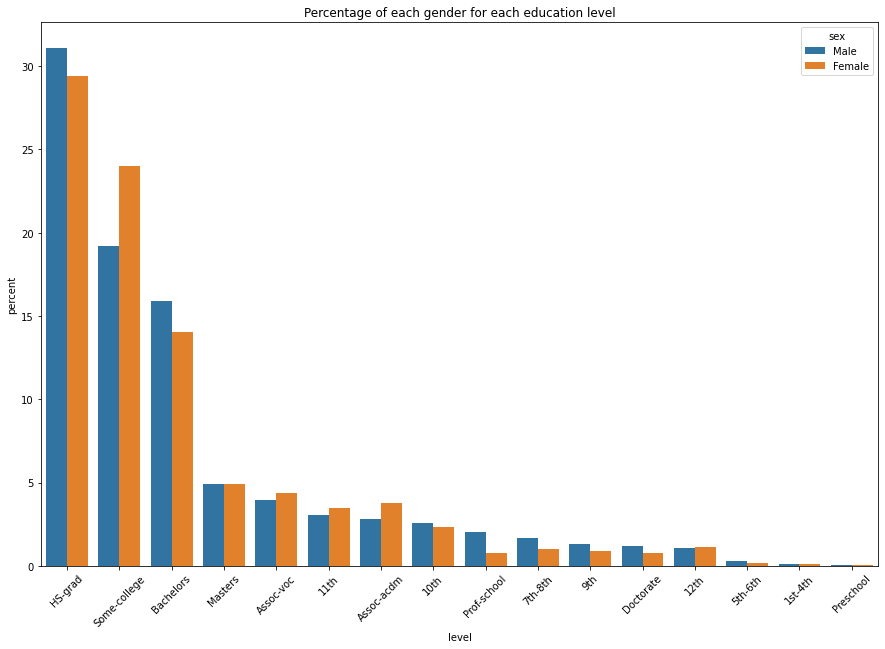

In [54]:
temp_male = pd.DataFrame(data[data.sex=='Male']['education'].value_counts()/20380)*100
temp_male['sex'] = 'Male'

temp_female = pd.DataFrame(data[data.sex=='Female']['education'].value_counts()/9782)*100
temp_female['sex']='Female'

temp = pd.concat([temp_male,temp_female])
temp.reset_index(inplace=True)

temp.columns = ['level','percent','sex']


## Grouped histogram for different education level and gender

plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
plt.title('Percentage of each gender for each education level')

sns.barplot(x='level', y='percent', data=temp, hue='sex')

# **Race distribution for each education level**

In [55]:
data['race'].value_counts()

## From above code we see trace distribution

White                 24218
Black                  2629
Asian-Pac-Islander      273
Amer-Indian-Eskimo      271
Other                   113
Name: race, dtype: int64

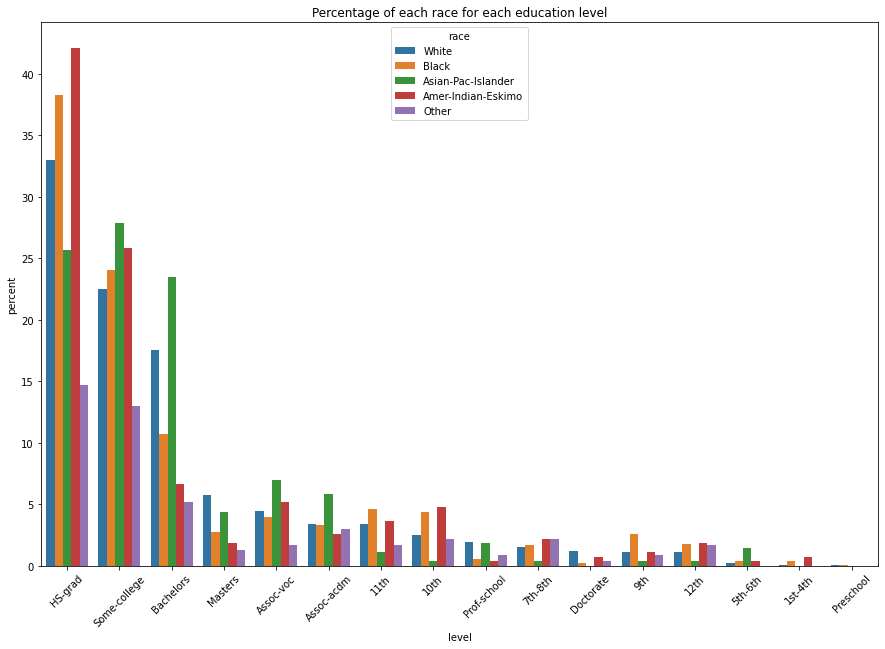

In [56]:
temp_white = pd.DataFrame(data[data.race=='White']['education'].value_counts()/24218)*100
temp_white['race'] = 'White'

temp_black = pd.DataFrame(data[data.race=='Black']['education'].value_counts()/2629)*100
temp_black['race'] = 'Black'

temp_Asian_Pac_Islander = pd.DataFrame(data[data.race=='Asian-Pac-Islander']['education'].value_counts()/273)*100
temp_Asian_Pac_Islander['race'] = 'Asian-Pac-Islander'

temp_Amer_Indian_Eskimo = pd.DataFrame(data[data.race=='Amer-Indian-Eskimo']['education'].value_counts()/271)*100
temp_Amer_Indian_Eskimo['race'] = 'Amer-Indian-Eskimo'

temp_other = pd.DataFrame(data[data.race=='Other']['education'].value_counts()/231)*100
temp_other['race'] = 'Other'

temp2 = pd.concat([temp_white,temp_black,temp_Asian_Pac_Islander,temp_Amer_Indian_Eskimo,temp_other])
temp2.reset_index(inplace=True)

temp2.columns = ['level','percent','race']

## Grouped histogram for different education level and gender

plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
plt.title('Percentage of each race for each education level')

sns.barplot(x='level', y='percent', data=temp2, hue='race')

# **Marital Status of individuals according to gender**

In [57]:
## Marital Status of individuals according to gender
px.histogram(data, x='sex', color="marital_status", barmode='group')

# **Marital status of majority of male and female with high salary and high education**


**Calling Custom Function - high_salary()**

In [58]:
#Calling custom function, the frist variable is education level(UPTO 4 levels with and below it will be included), second is dataset.
df_male, df_female = high_salary(16,data)


Balanced the male and female population size, Male population : 2010, Female population : 2010

 The count of men with respect to women is  54.69146238377007 percentage


In [59]:
high_edu_salary = pd.concat([df_male,df_female])

Text(0.5, 1.0, 'Marital status of people with high education and high salary')

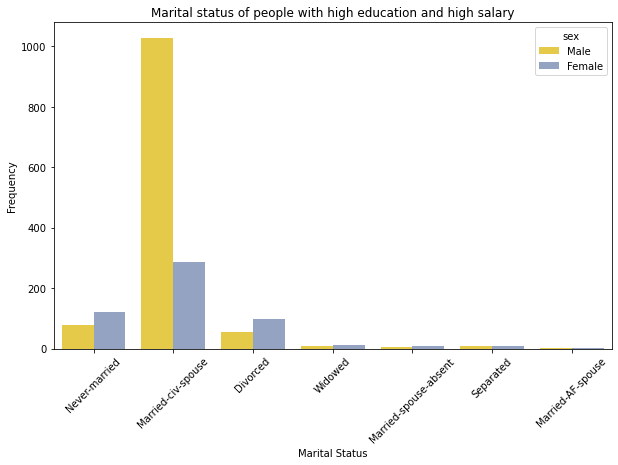

In [60]:
plt.figure(figsize=(10,6))

#sns.set_theme(style='darkgrid')
sns.countplot(x="marital_status",hue="sex", data=high_edu_salary,palette="Set2_r")

plt.xticks(rotation=45)
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.title('Marital status of people with high education and high salary')

# **Marital status of majority of male and female with high salary and low education**

In [61]:
#Calling custom function, the frist variable is education level(UPTO 4 levels with and below it will be included), second is class label, third is dataset.
df_male, df_female = high_salary(5, data)




Balanced the male and female population size, Male population : 215, Female population : 215

 The count of men with respect to women is  73.33333333333333 percentage


Text(0.5, 1.0, 'Marital status of people with low education and high salary')

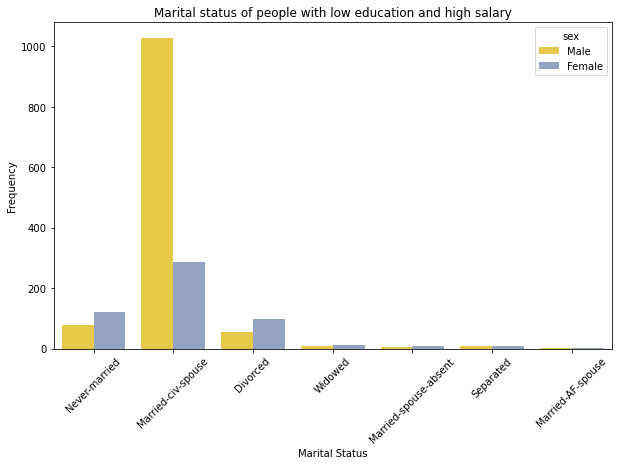

In [62]:
plt.figure(figsize=(10,6))

#sns.set_theme(style='darkgrid')
sns.countplot(x="marital_status",hue="sex", data=high_edu_salary,palette="Set2_r")

plt.xticks(rotation=45)
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.title('Marital status of people with low education and high salary')

**Calling Custom Function - low_salary()**

# Marital status of majority of male and female with low salary and high education


Balanced the male and female population size, Male population : 215, Female population : 215

 The count of men with respect to women is  -6.565656565656567 percentage


Text(0.5, 1.0, 'Marital status of people with high education and low salary')

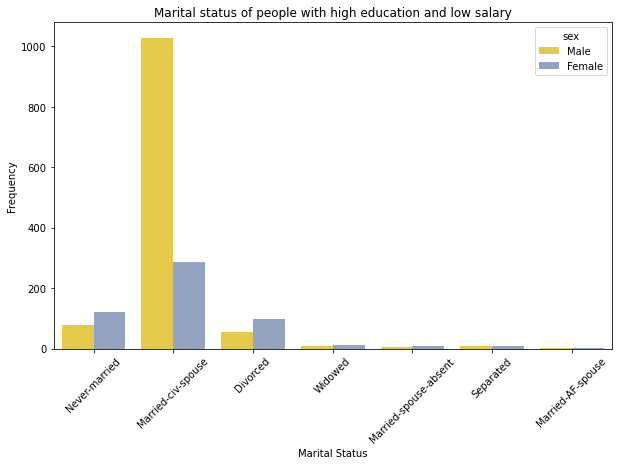

In [63]:
df_male, df_female = low_salary(5, data)
plt.figure(figsize=(10,6))

#sns.set_theme(style='darkgrid')
sns.countplot(x="marital_status",hue="sex", data=high_edu_salary,palette="Set2_r")

plt.xticks(rotation=45)
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.title('Marital status of people with high education and low salary')

# **Age groups and high salary histogram**


In the age group, 40-50 people make the most 

Text(0.5, 1.0, 'Number of people for each age group who makes more than 50k per year')

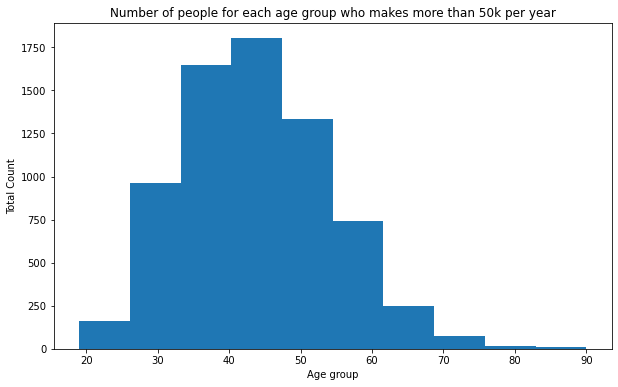

In [64]:
data_high = data[data.income == '>50K']

plt.figure(figsize=(10,6))
plt.hist(data_high.age, bins = 10)

plt.xlabel('Age group')
plt.ylabel('Total Count')
plt.title('Number of people for each age group who makes more than 50k per year')


In [65]:
data_farm=data[data.occupation=='Farming-fishing']
bins = [0,40,100]

data_farm['hours_binned'] = pd.cut(data_farm['weekly_hours'],bins)

<ipython-input-65-dee603fb69b8>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 1.0, 'Working Hours and Income')

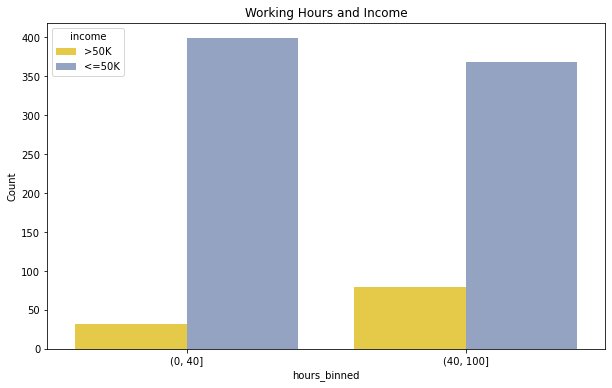

In [66]:
plt.figure(figsize=(10,6))

#sns.set_theme(style='darkgrid')

sns.countplot(data=data_farm,x="hours_binned",hue="income",palette='Set2_r')

plt.xlabe=('Working Hours')
plt.ylabel('Count')

plt.title('Working Hours and Income')

# **Age groups and low salary histogram**

Text(0.5, 1.0, 'Number of people for each age group who makes less than 50k per year')

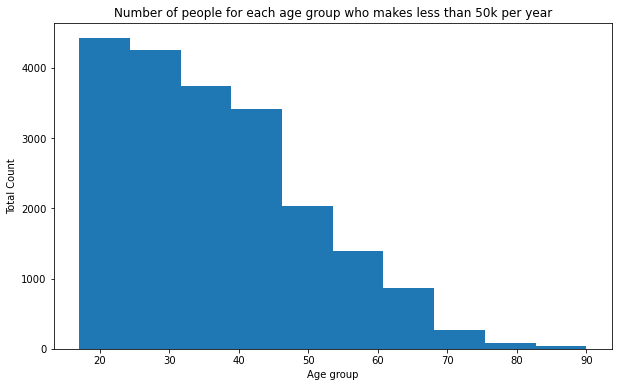

In [67]:
data_low = data[data.income == '<=50K']

plt.figure(figsize=(10,6))

plt.hist(data_low.age, bins = 10)
plt.xlabel('Age group')
plt.ylabel('Total Count')
plt.title('Number of people for each age group who makes less than 50k per year')

# **Was there salary gap for white an other in US?**

In [68]:

df_white = data[(data["race"]=='White') & ((data['education_number'] != 14) | (data['education_number'] != 15) | (data['education_number'] != 16))]
df_black = data[(data["race"] =='Black') & ((data['education_number'] != 14) | (data['education_number'] != 15) | (data['education_number'] != 16))]

white_count = df_white.income.count()
black_count = df_black.income.count()



white_percent = pd.DataFrame(df_white.groupby(by='income').count().age*100/white_count)
white_percent.insert(0, 'race', 'white')

black_percent = pd.DataFrame(df_black.groupby(by='income').count().age*100/black_count)
black_percent.insert(0, 'race', 'Non White')

race_edu_percent = pd.concat([white_percent,black_percent])

race_edu_percent.reset_index(inplace=True)

race_edu_percent.columns = ['income','race','percent']

race_edu_percent

,income,race,percent
0,<=50K,white,72.999422
1,>50K,white,27.000578
2,<=50K,Non White,86.953214
3,>50K,Non White,13.046786


Text(0.5, 1.0, 'Income levels for low-educated people for different races')

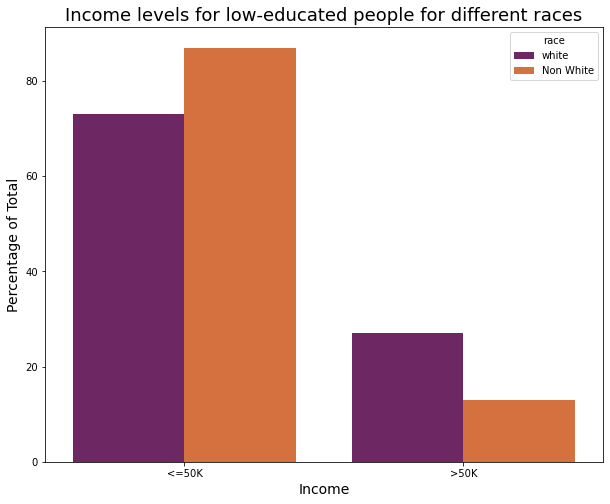

In [69]:
plt.figure(figsize=(10,8))



sns.barplot(x='income',y='percent',data=race_edu_percent,hue='race',palette='inferno')


plt.xlabel('Income',fontsize=14)
plt.ylabel('Percentage of Total',fontsize=14)
plt.title('Income levels for low-educated people for different races',fontsize=18)

# **Prediction**

**Problem Statement -** To predict given user details, whether the yearly salary is >50K or <50K

**Real world/ Business objectives -**


1.   Interpretability is important
2.   No latency requirement




**Metric to test model performance**

Since we want to give equal importance to both classes (>50K and <50K) prediction ability, we look at ROC curve. 

Our metric is 'AUC" (Area Under Curver)  

**Check to see if data is imbalanced/ balanced**

In [70]:
# check the distribution
data_ml['income'].value_counts()/data_ml.shape[0]

<=50K    0.751078
>50K     0.248922
Name: income, dtype: float64

**A one hot encoding allows the representation of categorical data to be more expressive. Many machine learning algorithms cannot work with categorical data directly. The categories must be converted into numbers**

In [71]:
#convert categories to numbers
def one_hot_encoding(df, cols):
  df_1 = df.drop(columns = cols, axis = 1)
  df_2 = pd.get_dummies(df[cols])

  return (pd.concat([df_1,df_2], axis = 1, join='inner'))

Dropped country as we are only interested in United States and dropped education as we want the columns to be feature independent

In [72]:
#splitting dataset into X and y

salary = {'>50K': 1,'<=50K': 0}
data_ml.income = [salary[item] for item in data_ml.income] 

data_ml = data_ml[data_ml.country == 'United-States']

X=data_ml.drop(columns=['income', 'country','education'],axis=1)
y=data_ml['income']
print(X.head(5))


#training and testing data split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

X_train = one_hot_encoding(X_train, X_train.select_dtypes('object').columns)
X_test = one_hot_encoding(X_test, X_test.select_dtypes('object').columns)

   age workclass  fnlwgt  education_number marital_status         occupation  \
1   82   Private  132870                 9        Widowed    Exec-managerial   
3   54   Private  140359                 4       Divorced  Machine-op-inspct   
4   41   Private  264663                10      Separated     Prof-specialty   
5   34   Private  216864                 9       Divorced      Other-service   
6   38   Private  150601                 6      Separated       Adm-clerical   

    relationship   race     sex  capital_gain  capital_loss  weekly_hours  
1  Not-in-family  White  Female             0          4356            18  
3      Unmarried  White  Female             0          3900            40  
4      Own-child  White  Female             0          3900            40  
5      Unmarried  White  Female             0          3770            45  
6      Unmarried  White    Male             0          3770            40  


In [73]:
print(X_train.columns)

Index(['age', 'fnlwgt', 'education_number', 'capital_gain', 'capital_loss',
       'weekly_hours', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'marital_status_Divorced',
       'marital_status_Married-AF-spouse', 'marital_status_Married-civ-spouse',
       'marital_status_Married-spouse-absent', 'marital_status_Never-married',
       'marital_status_Separated', 'marital_status_Widowed',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'rel

Unbalanced splitting of train and test in ratio - 3:1

In [74]:

print("\nTrain splitting\n", y_train.value_counts()/y_train.count())
print("\nTest splitting\n", y_test.value_counts()/y_test.count())


Train splitting
 0    0.745689
1    0.254311
Name: income, dtype: float64

Test splitting
 0    0.745637
1    0.254363
Name: income, dtype: float64


In [75]:
#Building the model
model = GaussianNB()
model.fit(X_train, y_train);

In [76]:
#Predicting the model
y_pred = model.predict(X_test)


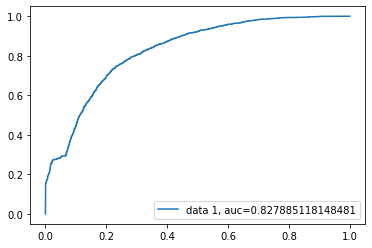

In [77]:

y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [78]:

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)



Predicted     0    1
Actual              
0          5811  342
1          1485  614


**Normalising continuos column- fnlwgt to improve model performance**

In [79]:
#Normalised the fnlwgt column
max_value = data_ml['fnlwgt'].max()
min_value = data_ml['fnlwgt'].min()
data_ml['fnlwgt'] = (data_ml['fnlwgt'] - min_value) / (max_value - min_value)
X=data_ml.drop(columns=['income', 'country','education'],axis=1)
y=data_ml['income']
print(X.head(4))

   age workclass    fnlwgt  education_number marital_status  \
1   82   Private  0.080970                 9        Widowed   
3   54   Private  0.086061                 4       Divorced   
4   41   Private  0.170568                10      Separated   
5   34   Private  0.138072                 9       Divorced   

          occupation   relationship   race     sex  capital_gain  \
1    Exec-managerial  Not-in-family  White  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   
5      Other-service      Unmarried  White  Female             0   

   capital_loss  weekly_hours  
1          4356            18  
3          3900            40  
4          3900            40  
5          3770            45  


In [80]:
#print(X_train)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)
X_train = one_hot_encoding(X_train, X_train.select_dtypes('object').columns)
X_test = one_hot_encoding(X_test, X_test.select_dtypes('object').columns)
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

**Model performance improved after normalising continuos column**

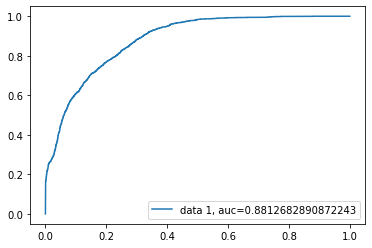

In [81]:
#Gaussian NB model

y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

**Featue importance** 

**Using random forest's inbuilt feature importance. However, we are not using random forest to chekc the model prdictibility as it is highly non-interpretable** 

In [82]:
# RandomForest without tuning
from sklearn.ensemble import RandomForestClassifier
rf1= RandomForestClassifier()
rf1.fit(X_train,y_train)

RandomForestClassifier()

Text(0.5, 1.0, 'Feature Importance Plot')

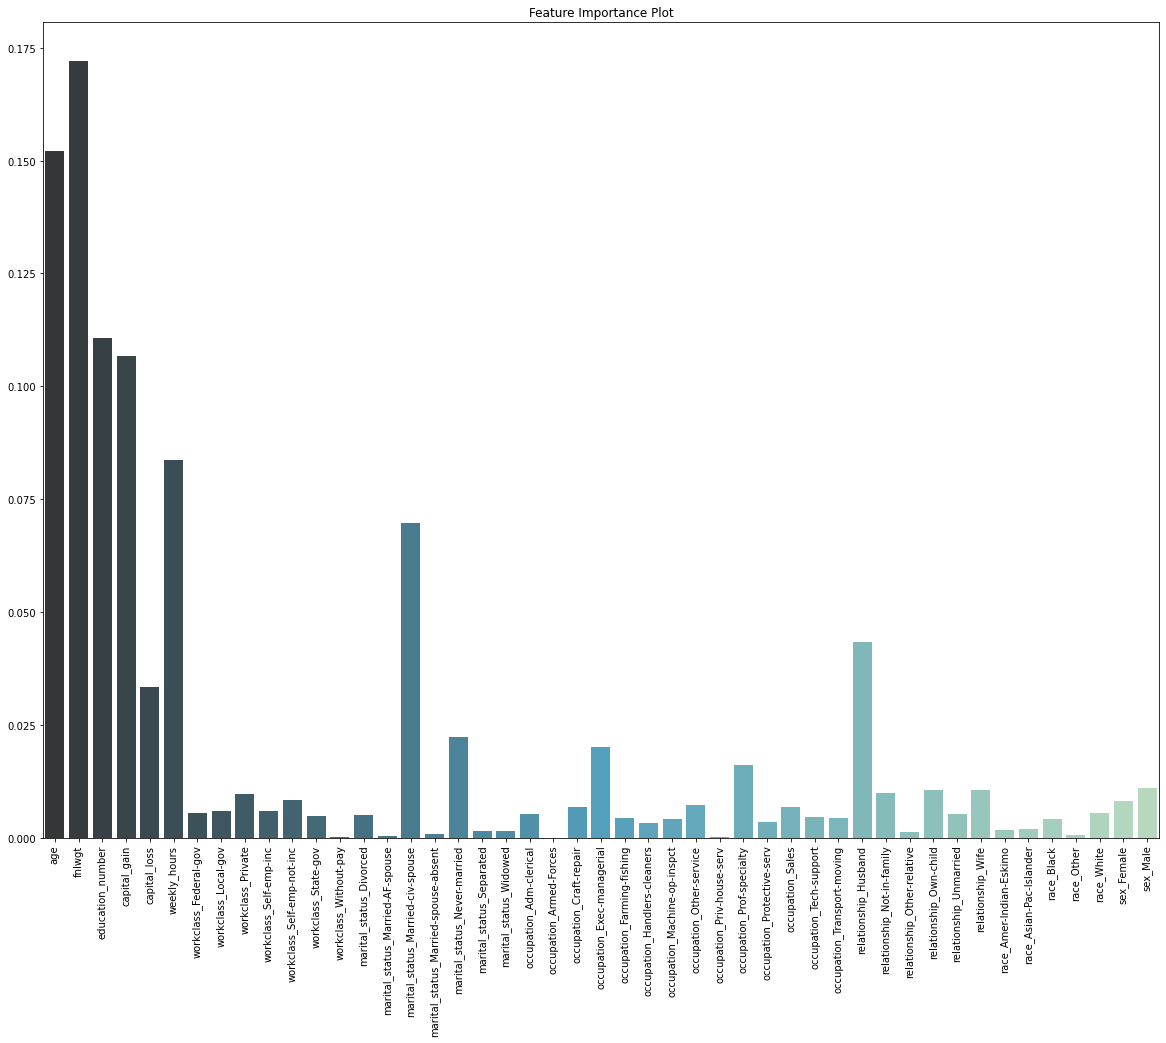

In [83]:
plt.figure(figsize=(20,15))
sns.barplot(y = rf1.feature_importances_,x = X_train.columns.values,palette='GnBu_d')
plt.xticks(rotation=90)
plt.title('Feature Importance Plot')

**Features most important are - fnlwgt, age, hour of work, education level, capital_gain and weekly work hours**

# Conclusion

Most interesting analyses are done on recent data. We found it rather intriguing to work on a relatively old data that contained information of US census data.
We started our analysis by understanding what census is and how it is such an important part in understanding the progress of any country.Our data from from 1994 which included features like age, education, marital status, hours of work and salary below or above 50K annually and the number of people satisfying these categories. 

We transformed some columns to avoid confusion between column names and function call.

We also created our custom function, since the code gor repeated twice. We import this module before we can use it.

We found out that marital status goes not affect the womans salary status, which was rather interesting. Also, the most whites had a high salary compared to the other races. 
Unfortunately, farmers who, despite having high education and long hours of work, small proportion of them had. hgh salary.

In our data, age had the high feature importance, along with number of people falling in that category(fnlwgt), education and weekly hours worked.
This was pretty practical and understandable when we tried to think of real life scenerios.

We also carried out predictive analysis, though not of any practical significance helped us brainstorm a good model. Our business scenerio was an interpretable model and has no latency requiremement. All our features are independent of each other, and the ones which practically had direct significance - education name and education number, education _name was dropped.

For the above description, naive bayes algorithm was most suited. The metric to jugde the model was - AUC (Area Under the Curve). This is because, our dataset is unbalanced (3:1, < 50k: >50K ), categorical and both the categories have equal importance. Precision and recall are preferred when one category has a higher importance.

We considered laplace smoothing, however, on reading we realised it is most recommended for text data, to avoid overfitting/ underfitting. We carried out 'One hot encoding' to convert categorical values to numberical values.

The Naive Bayes model had AUC - 0.83 . To improve performance, we normalised our only continous column, which also had the highest feature importance - fnlwgt. This ncreased the AUC value to AUC: 0.89.

# References

 Tracy Nham. Classifying Income from 1994 Census Data.  - http://cseweb.ucsd.edu/classes/sp15/cse190-c/reports/sp15/024.pdf 

Ron Kohavi, "Scaling Up the Accuracy of Naive-Bayes Classifiers: a Decision-Tree Hybrid", Proceedings of the Second International Conference on Knowledge Discovery and Data Mining, 1996. (PDF)

US Income from 1994 Census Data.  -https://www2.1010data.com/documentationcenter/beta/Tutorials/MachineLearningExamples/CensusIncomeDataSet.html

